In [2]:
using CSV
using DataFrames
using Plots
using PlotThemes
using Unitful

In [42]:
data = CSV.read("alltimes.csv", DataFrame)

,case,real,user,sys
,String,String,String,String
1,echoALL,3m55.325s,21m45.461s,0m16.459s
2,foamEND,3m53.191s,22m4.453s,0m17.351s
3,foamEXE,7m5.136s,40m24.752s,0m34.638s
4,foamEXE_pvbatchEXE,7m44.120s,43m37.686s,0m52.873s
5,foamWRITE,7m1.230s,40m5.915s,0m28.828s
6,foamWRITE_pvbatchEND,6m43.793s,38m19.528s,0m24.554s
7,foamWRITE_pvbatchWRITE,7m14.771s,41m5.722s,0m40.184s
8,original,4m0.711s,22m5.480s,0m14.673s
9,pvbatchWRITE,4m21.096s,24m33.542s,0m28.703s


In [43]:
function get_total_seconds(s::String)
    splitmin, splitsec = split(s, "m")
    num_min = parse(Int, splitmin)
    num_sec = parse(Float64, strip(splitsec, 's'))
    num_min*u"minute" + num_sec*u"s"
end

get_total_seconds (generic function with 1 method)

In [44]:
data.real = get_total_seconds.(data.real)
data.user = get_total_seconds.(data.user)
data.sys = get_total_seconds.(data.sys)

10-element Array{Quantity{Float64,𝐓,Unitful.FreeUnits{(s,),𝐓,nothing}},1}:
 16.459 s
 17.351 s
 34.638 s
 52.873 s
 28.828 s
 24.554 s
 40.184 s
 14.673 s
 28.703 s
 28.223 s

In [26]:
data.case = chop.(data.case, tail=4)

8-element Array{SubString{String},1}:
 "echoALL"
 "foamEXE"
 "foamWRITE"
 "foamWRITE_pvbatchEND"
 "foamWRITE_pvbatchWRITE"
 "original"
 "pvbatchWRITE"
 "pvpythonWRITE"

In [45]:
data.real = data.real |> ustrip
data.user = data.user |> ustrip
data.sys  = data.sys  |> ustrip

10-element reinterpret(Float64, ::Array{Quantity{Float64,𝐓,Unitful.FreeUnits{(s,),𝐓,nothing}},1}):
 16.459
 17.351
 34.638
 52.873
 28.828
 24.554
 40.184
 14.673
 28.703
 28.223

In [46]:
sort!(data, :real, rev=true)

,case,real,user,sys
,String,Float64,Float64,Float64
1,foamEXE_pvbatchEXE,464.12,2617.69,52.873
2,foamWRITE_pvbatchWRITE,434.771,2465.72,40.184
3,foamEXE,425.136,2424.75,34.638
4,foamWRITE,421.23,2405.91,28.828
5,foamWRITE_pvbatchEND,403.793,2299.53,24.554
6,pvpythonWRITE,263.844,1483.54,28.223
7,pvbatchWRITE,261.096,1473.54,28.703
8,original,240.711,1325.48,14.673
9,echoALL,235.325,1305.46,16.459


In [28]:
theme(:bright)

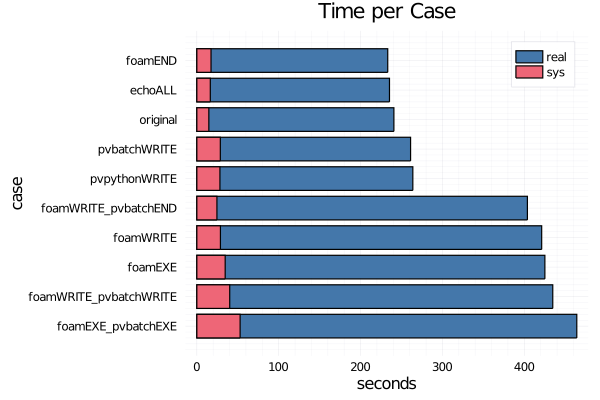

In [47]:
bar(data.case, [data.real, data.sys], 
    orientation = :h,
    title = "Time per Case", 
    label = ["real" "sys"], 
    xlabel = "seconds", 
    ylabel = "case")

In [48]:
savefig("/home/jake/Downloads/benchmarks.png")